# Visualizing Data for Regression

In this lab, you will learn how to use Python to **visualize and explore data**. This process is also known as **exploratory data analysis**. 

Before creating analytical models, a data scientist must develop an understanding of the properties and relationships in a dataset. There are two goals for data exploration and visualization. First to understand the relationships between the data columns. Second to identify features that may be useful for predicting labels in machine learning projects. Additionally, redundant, collinear features can be identified. Thus, visualization for data exploration is an essential data science skill.

In this module you will explore two datasets. Specifically, in this lab, your first goal is to explore a dataset that includes information about automobile pricing. In other labs you will use what you learn through visualization to create a solution that predicts the price of an automobile based on its characteristics. This type of predictive modeling, in which you attempt to predict a real numeric value, is known as **regression**; and it will be discussed in more detail later in the course. For now, the focus of this lab is on visually exploring the data to determine which features may be useful in predicting automobile prices.

This lesson is divided into several parts. In each part you will learn how to use the visualization tools available in Python to explore complex data. Specifically you will learn:

- **Summarizing and manipulating data**:
  * How large is it?
  * What columns are of interest?
  * What are the characteristics of the data derived from summary statistics and counts?
- **Developing multiple views of complex data** using multiple chart types. Exploring complex data requires multiple views to understand the many relationships. It is impossible to develop a complete understanding from just a few plots.
- **Overview of Matplotlib, Pandas plotting and Seaborn** which are commonly used Python plotting packages. 
- **Overview of univariate plot types** is a review of creating these basic plots using three Python packages. These plot types allow you to study the distributional properties of the variables in your data set. 
- **Overview of two dimensional plot types** is a review of creating basic plot types used to construct visualizations. These plots naturally display the relationship between two variables on the 2-d computer graphics display. 
- **Using Aesthetics** is an overview of how to project additional plot dimensions using plot aesthetics. Using aesthetics provides a method for projecting additional dimensions onto the 2-d computer graphics display. 
- **Facetted plotting** also know as conditioned plotting or lattice plotting, introduces a powerful method for visualizing higher dimensional data. Arrays of plots of subsets of the data are arranged on the 2-d computer graphics display. 
- **Using Matplotlib methods** to add attributes to plots, such as titles and axis labels. 

## Loading the dataset

Before you can start visualization, you must load the dataset. The code in the cell below loads the data and performs some data cleaning. You will work through data cleaning and preparation methods in other labs. 

As a first step execute the code in the cell below to import the Python packages you will need for the rest of this notebook. Notice the IPython "magic" command `%matplotlib inline`. The `%` tells the Python interpreter that this is the start of a magic command; a command which configures the execution environment. The `matplotlib inline` magic indicates that you want to display graphics inline within the notebook. Execute this code 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The function clean_auto_data() below prepare the dataset. Data preparation is explained in more details in the subsequent module.

For now, execute the code in the cell below to load and prepare the automotive price dataset.

In [2]:
auto_prices = pd.read_csv('./Automobile price data _Raw_.csv')
print(auto_prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
def clean_auto_data(auto_prices):
    'Function to load the auto price data set from a .csv file' 
    import pandas as pd
    import numpy as np
    
    ## Recode names
    ## fix column names so the '-' character becomes '_'
    cols = auto_prices.columns
    auto_prices.columns = [str.replace('-', '_') for str in cols]
    
    ## Treat missing values
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak_rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    ## Transform column data type
    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])

    return auto_prices
auto_prices = clean_auto_data(auto_prices)

print(auto_prices.columns)

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


In [5]:
auto_prices

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Notice the column names. Most of these names are human interpretable and give you an idea of the information in this dataset. The `price` column is the **label**, the variable you are trying to predict. 

## Exploring the data

With the dataset loaded, you will now explore some basic properties using summary methods. 

First, you will examine the head (first few rows) of the Pandas data frame to gain an idea of the contents by executing the code in the cell below

In [6]:
auto_prices.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Scroll across and examine the contents of each column in this dataset. Some columns have **numeric values** and other columns contain **strings variables**. Some of the numeric columns appear to contain **integer values** and other have **floating point numbers**. In machine learning we treat the string columns as **categorical variables**. 

To better understand the data types in this dataset execute the code in the cell below to print the `dtypes` attribute of each column.

In [7]:
auto_prices.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

These results confirm the earlier operations. A column of type `object` contains a text string. 

Pandas provides a simple way to compute and display summary statistics for numeric columns using the `describe` method. Execute the code in the cell below and examine the results for each numeric column.

In [8]:
auto_prices.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
auto_prices.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,195.0,0.794872,1.230612,-2.00,0.00,1.00,2.00,3.00
wheel_base,195.0,98.896410,6.132038,86.60,94.50,97.00,102.40,120.90
length,195.0,174.256923,12.476443,141.10,166.30,173.20,184.05,208.10
width,195.0,65.886154,2.132484,60.30,64.05,65.40,66.90,72.00
height,195.0,53.861538,2.396778,47.80,52.00,54.10,55.65,59.80
curb_weight,195.0,2559.000000,524.715799,1488.00,2145.00,2414.00,2943.50,4066.00
engine_size,195.0,127.938462,41.433916,61.00,98.00,120.00,145.50,326.00
bore,195.0,3.329385,0.271866,2.54,3.15,3.31,3.59,3.94
stroke,195.0,3.250308,0.314115,2.07,3.11,3.29,3.41,4.17
compression_ratio,195.0,10.194974,4.062109,7.00,8.50,9.00,9.40,23.00


In [10]:
auto_prices.describe(include='O')

,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
count,195,195,195,195,195,195,195,195,195,195,195
unique,52,21,2,2,3,5,3,2,5,6,7
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,35,32,175,159,112,94,116,192,143,155,89


In [11]:
auto_prices.describe(include='O').transpose()

,count,unique,top,freq
normalized_losses,195,52,?,35
make,195,21,toyota,32
fuel_type,195,2,gas,175
aspiration,195,2,std,159
num_of_doors,195,3,four,112
body_style,195,5,sedan,94
drive_wheels,195,3,fwd,116
engine_location,195,2,front,192
engine_type,195,5,ohc,143
num_of_cylinders,195,6,four,155


There is a lot of information here. For each numeric column the following is printed:
-  The count of the cases in the column. In this case, all counts are the same. 
- The mean and standard deviation of the values in the column. Notice that there is a wide range of mean and scale (standard deviation values) across these columns. 
- The minimum and maximum of the values in the column. Again, the extreme range of these columns varies quite a lot. 
- The quartiles are displayed, 25%, 50% or median value, and 75%. For many of these columns, such as curb_weight and the label value, price, there is a significant difference between the mean and the median values. When the median value is less than the mean, this indicates that the distribution is right-skewed, that is, with a tail stretching toward the right. 

Now, you will consider how you can understand the distributions of categorical variables. Using a single line of Pandas code allows you to compute and display a **frequency table** using the `value_counts` method. A frequency table shows the frequency of each unique category of a categorical variable.  

The code in the cell prints frequency table for a list of categorical columns. Execute this code and examine the results.

In [12]:
auto_prices['make'].value_counts()

toyota           32
nissan           18
mazda            13
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64

In [13]:
len(auto_prices['make'].value_counts())

21

In [14]:
auto_prices['make'].value_counts().sum()

195

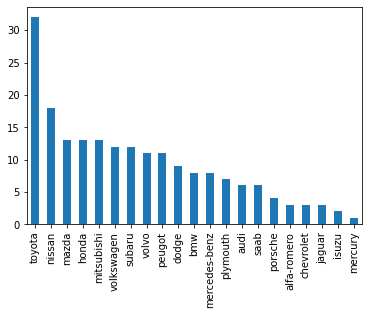

In [15]:
auto_prices['make'].value_counts().plot(kind='bar')

In [16]:
def count_unique(auto_prices, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(auto_prices[col].value_counts())

cat_cols = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 
            'fuel_system']
count_unique(auto_prices, cat_cols)


For column make
toyota           32
nissan           18
mazda            13
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64

For column fuel_type
gas       175
diesel     20
Name: fuel_type, dtype: int64

For column aspiration
std      159
turbo     36
Name: aspiration, dtype: int64

For column num_of_doors
four    112
two      81
?         2
Name: num_of_doors, dtype: int64

For column body_style
sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

For column drive_wheels
fwd    116
rwd     71
4wd      8
Name: drive_wheels, dtype: int64

For column engine_location
front    192
rear    

There are some basic facts you can derive from these frequency tables. 
1. Some of these variables have a large number of categories. When performing machine learning with a limited size training dataset, having a large number of categories is problematic, since there will be few samples per category. For example, notice how many auto makes are represented. There is only 1 Mercury and 2 Isuzus. Thus, any statistical property for these categories will be poorly determined. 
2. There are significant imbalances in the counts of some categories. You have already seen that there are significant differences in the counts of autos by make. As another example, there are only 3 cars with rear engine autos. Again, any statistical property of rear engine cars will be poorly determined.
3. Some categorical variables could reasonably converted to numeric variables. For example, the number of cylinders is currently a categorical variable, but could be transformed to a numeric variable. 

***
**Note:** There are two other cases to consider with the transformations between numeric and categorical variables.
1. Some categorical variables indicate rank, for example large, medium and small. In these cases, it may be better to transform these values to numeric levels.
2. Just as it might be useful to transform a categorical variable to numeric, it may be advantageous to convert a numeric variable to a categorical variable. This is particularly the case if the numeric values are simply coding for a category with no particular meaning.  
***

## Visualizing Automobile Data for Regression
Python supports the matplotlib library; which provides extensive graphical capabilities.  Additionally, the Python Pandas library and the Seaborn library add a higher level graphics capability. Pandas and Seaborn abstract a lot of the low level details. As you will see, since these libraries are based on Matplotlib, you can always add needed details. These features make Python a useful language to create visualizations of your data when exploring relationships between the data features.  Further, you can identify features that may be useful for predicting labels in machine learning projects.

## Visualizing distributions

With some basic understanding of the data set in mind, it is time to dig a bit deeper. In this section you will apply methods to explore the distributions of categorical and numeric data.

### Bar charts

As a first step, you will use **bar charts** to examine the frequency distributions of categorical variables. A bar chart displays frequencies of each category. In most cases, the categories should be **ordered by frequency**; ascending or descending. Ordering categories by frequency aids in viewer interpretation. 

Execute the function in the cell below to perform the following processing:
1. Iterates over the list of columns.
2. The figure and axes are  defined using Matplotlib methods. 
3. The counts or frequencies of the categories are computed.
4. The bar plot is created using the Pandas `plot.bar` method. Notice that the color argument is set to blue. The default to used **multiple colors for no reason whatsoever is distracting and does not add to interpretation**.
5. Annotations are added to the plot using Matplotlib methods.

Since Pandas plotting is built on Matplotlib, it is always possible to add additional plot attributes using methods in this package.

Execute this code and examine the results.

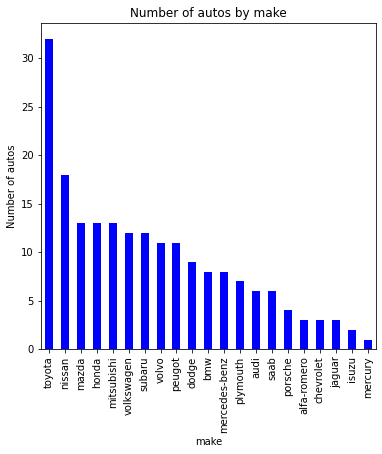

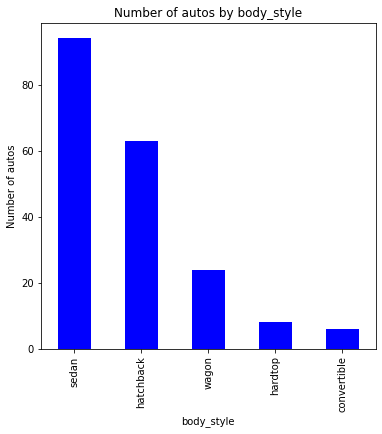

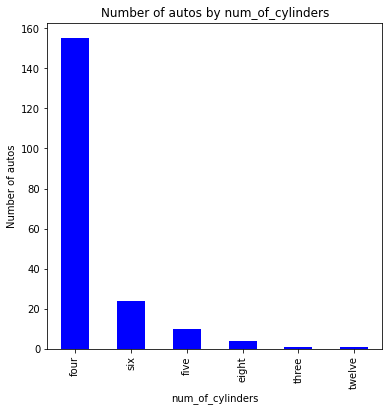

In [17]:
def plot_bars(auto_prices, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = auto_prices[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts series
        ax.set_title('Number of autos by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos') # Set text for y axis
        plt.show()

plot_cols = ['make', 'body_style', 'num_of_cylinders']
plot_bars(auto_prices, plot_cols)

These plots show the wide range of frequencies for the categorical variables plotted. This will be a problem with modeling, as there are so few members of some classes. 

### Histograms

**Histograms** are related to bar plots. Whereas, a bar plot shows the counts of unique categories, a histogram shows the **number of data values within a bin** for a **numeric variable**. The bins divide the values of the variable into equal segments. The vertical axis of the histogram shows the count of data values within each bin.  

The code below follows the same basic recipe used for the bar plot to create a histogram. In this case, the Pandas `plot.hist` method is used. 

Execute this code, examine the results, and answer **Question 1** on the course page.

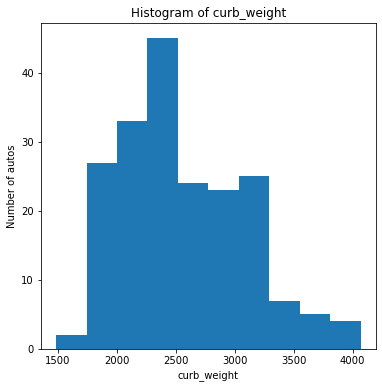

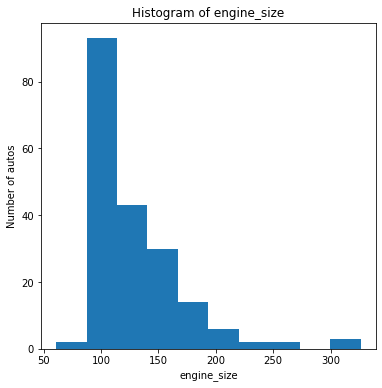

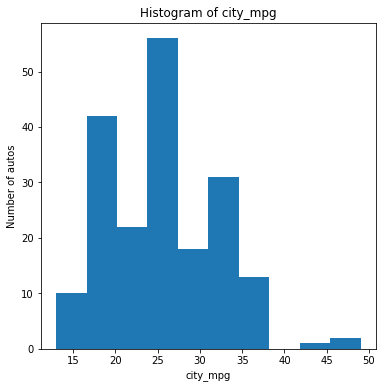

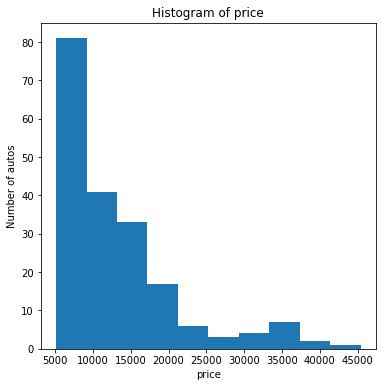

In [18]:
def plot_histogram(auto_prices, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        auto_prices[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()
        
num_cols = ['curb_weight', 'engine_size', 'city_mpg', 'price']    
plot_histogram(auto_prices, num_cols)

Some of these variables have distributions that are right-skewed, or skewed to the right side. This skewed distribution will affect the statistics of any machine learning model. 

### Kernel density plots and introduction to Seaborn

Up until now you have been working exclusively with the plotting methods in Pandas. Now, you will use the Seaborn package.  Seaborn is a newer Python package which abstracts lower level matplotlib charts. Seaborn also implements some additional cutting-edge chart types.

**Kernel density estimation** or **kde** plots are similar in concept to a histogram. A kernel density plot displays the values of a smoothed density curve of the data values. In other words, the kernel density plot is a smoothed version of a histogram.
 
The code in the cell below creates a kernel density plot following the recipe used before. Using Seaborn adds the following to the recipe:
1. Set a style for the plot grid.
2. Define the plot type with `distplot` using the engine-size column as the argument. In this case, no histogram is plotted. A 'rug' showing the locations of the data points on the axis is displayed along the horizontal axis.
3. Once again, Matplotlib methods are used to add the annotations to the plot. Seaborn is built on Matplotlib, so it is always possible to mix Matplotlib methods.  
 
****
**Note:** Depending on your platform and versions of numpy, you may see a deprecation warning. You can safely ignore this warning. 
****

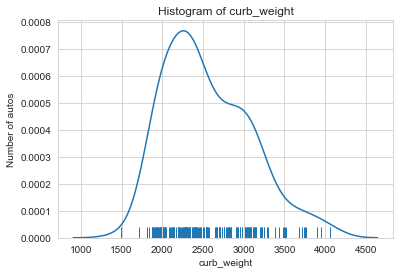

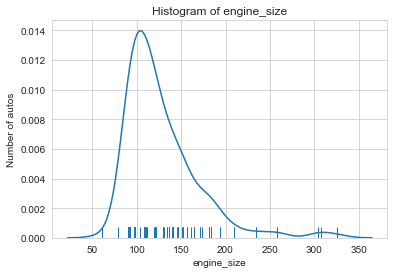

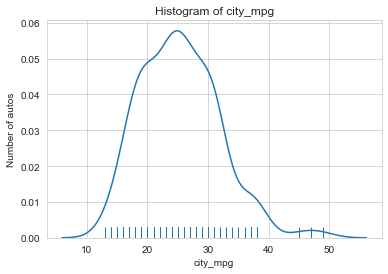

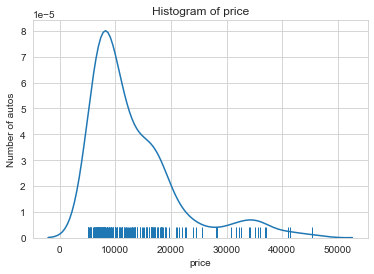

In [21]:
def plot_density_hist(auto_prices, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of autos') # Set text for y axis
        plt.show()
        
plot_density_hist(auto_prices, num_cols)        

The kde plots show the same skewness properties of the histogram. The rug shows a different view of the density of the data points on the axis. Some details are more evident in this view.  

### Combine histograms and kdes

Combining a histogram and a kde can highlight different aspects of a distribution. This is easy to do with Seaborn, as the code below demonstrates. In this case, the number of bins for the histogram has been increased from 10 to 20. 

Execute this code, examine the results, and answer **Question 2** on the course page.

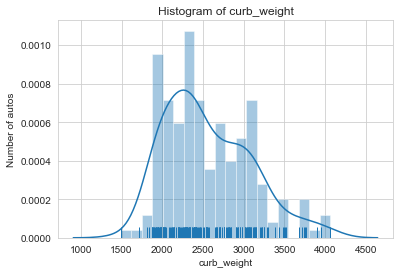

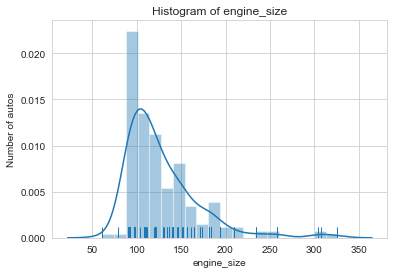

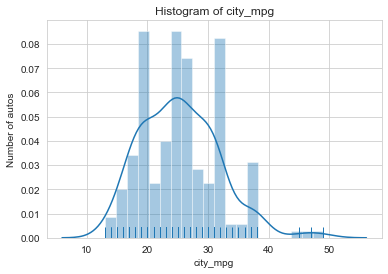

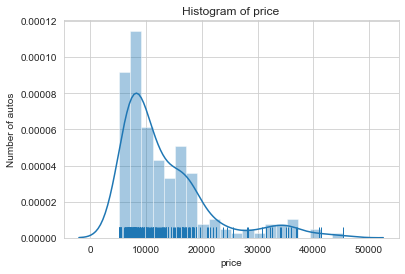

In [22]:
plot_density_hist(auto_prices, num_cols, bins = 20, hist = True)

This view highlights the fact that some features have multimodal distributions. This fact, will have implications for the statistics of any machine learning model trained with these data.

## Two dimensional plots

Having used summary statistics and several one dimensional plot methods to explore data, you will continue this exploration using **two dimensional plots**. Two dimensional plots help you develop an understanding  of the **relationship between two variables**. For machine learning, the relationship of greatest interest is between the **features** and the **label**. It can also be useful to examine the relationships between features to determine if the features are co-variate or not. Such a procedure can prove more reliable than simply computing correlation when the relationship is nonlinear. 

### Create Scatter Plots

Scatter plots are widely used to examine the relationship between two variables. In this case, the plots created are of some features vs. the label, price of the auto. 

The code in the cell below follows the previously used recipe for using Pandas plotting methods, using the `plot.scatter` method. This method has two required arguments for the x and y axes. Execute this code and examine the results.

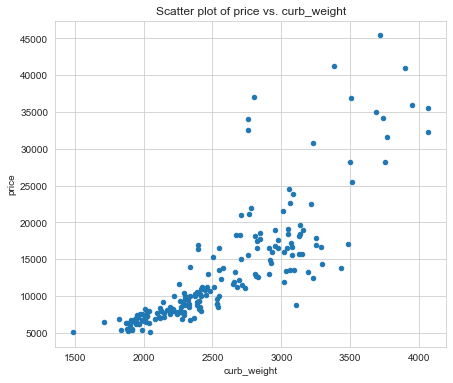

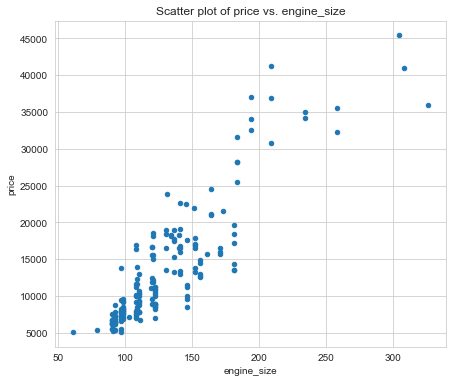

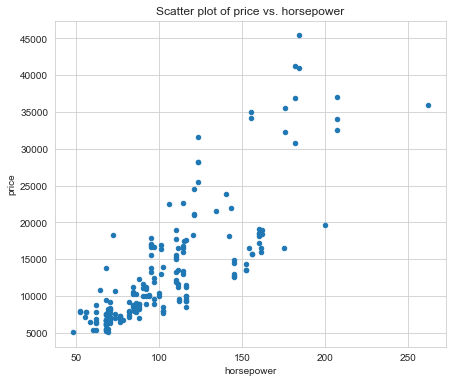

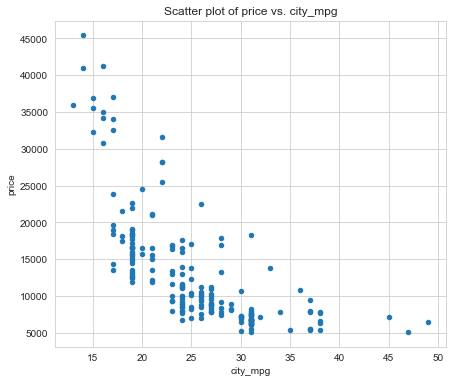

In [23]:
def plot_scatter(auto_prices, cols, col_y = 'price'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter(auto_prices, num_cols)        

These plots show a strong relationship between these features and the label. It is likely these features will be useful in predicting the price of autos. engine_size and horsepower have fairly linear relationships with price, whereas curb_weight and especially city_mpg do not. 

It seems likely that hoursepower and engine_size are colinear. To test this hypothesis execute the code in the cell below and examine the result.

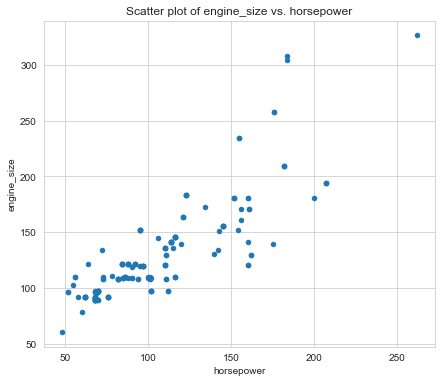

In [24]:
plot_scatter(auto_prices, ['horsepower'], 'engine_size') 

Indeed these features do appear linearly dependent. Therefore, you will not want to use them in the same machine learning model. 

### Deal with overplotting

Examine the engine_size or city_mpg vs price above. Notice, that for certain engine sizes and city_mpg ratings there are numerous autos in a narrow price range. Apparently, auto manufactures target these characteristics. The result is that many points are plotted one over the other on the scatter plots, resulting in **over plotting**. Over plotting is a serious problem when scatter plots are applied to large datasets. Serious over plotting can render a plot meaningless or uninterpretable. 

Fortunately, there are several good ways to deal with over plotting:
1. Use **transparency** of the points to allow the view to see though points. With mild over plotting this approach can be quite effective.
2. **Countour plots** or **2d density plots** show the density of points, much as a topographic map shows elevation. Generating the contours has high computational complexity and making this method unsuitable for massive datasets.
3. **Hexbin plots** are the two-dimensional analog of a histogram. The density of the shading in the hexagonal cells indicates the density of points. Generating hexbins is computationally efficient and can be applied to massive datasets.

The code in the cell below modifies the scatter plot function used previously to add a transparency argument. In statistical graphics, alpha, the inverse of transparency is specified; alpha = 1.0 is opaque, alpha = 0.0 is perfectly transparent. The code in the cell below uses low alpha of 0.2 (high transparency). Execute this code and examine the results. 

In [25]:
num_cols

['curb_weight', 'engine_size', 'horsepower', 'city_mpg']

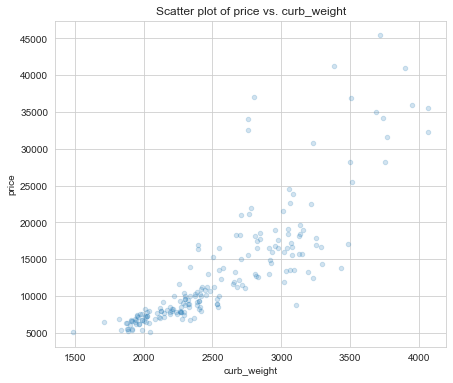

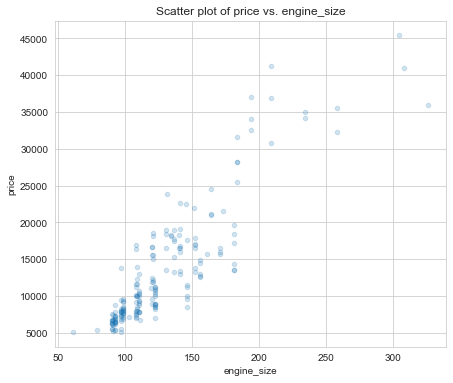

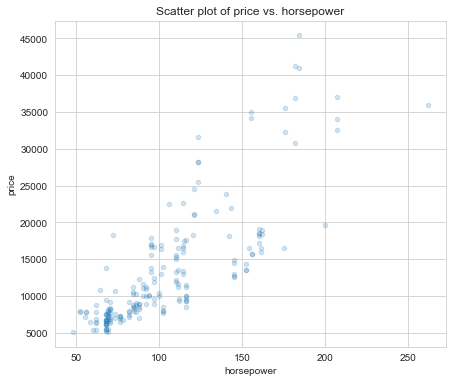

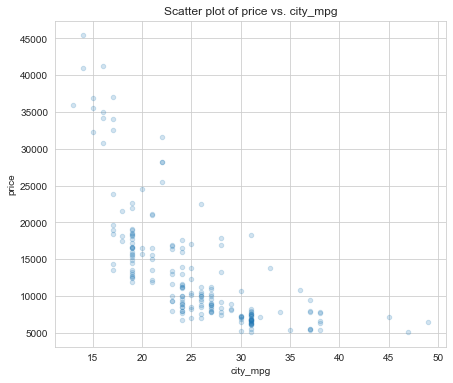

In [26]:
def plot_scatter_t(auto_prices, cols, col_y = 'price', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y) # Set text for y axis
        plt.show()

plot_scatter_t(auto_prices, num_cols, alpha = 0.2)

With the high transparency it is now possible to see though points in dense areas to get a better view of the data. 

Using transparency for overplotting is useful, but limited. With large number of points, you will need other methods. Using contour or 2d density plots is one such solution. The code in the cell below uses the `jointplot` function from Seaborn. This plots displays 1d KDE plots along with the countour plot showing 2d density. Execute this code and examine the results.

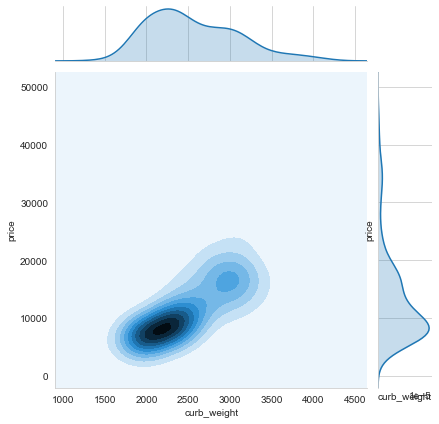

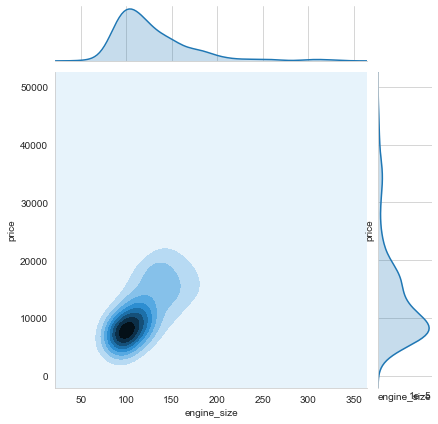

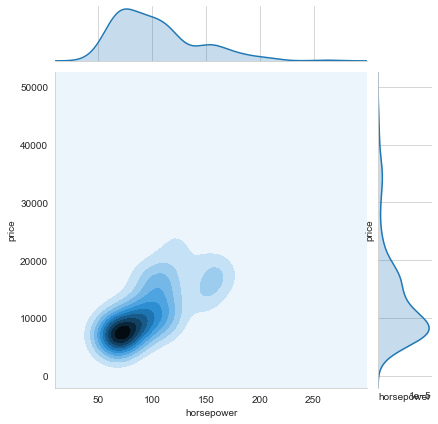

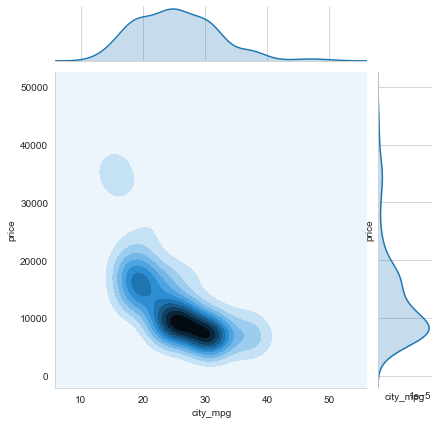

In [27]:
def plot_desity_2d(auto_prices, cols, col_y = 'price', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=auto_prices, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y) # Set text for y axis
        plt.show()

plot_desity_2d(auto_prices, num_cols)

These density contour plots show quite a different view of the relationship between these features and the label. In particular, 2d multi-modal behavior is visible for curb_weight, horsepower and particularly city_mpg. Notice also, a correlation coefficient is displayed. 

The code in the cell below displays the 2d hexbin plots and 1d histograms for the same variables. Execute this code and examine the results.

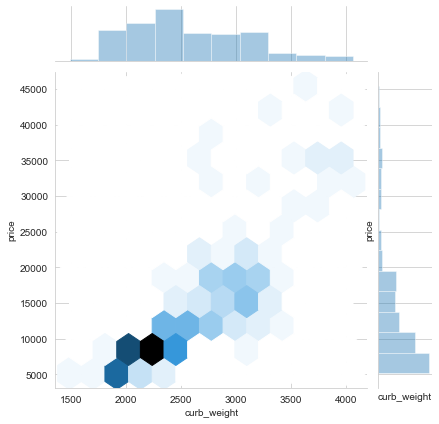

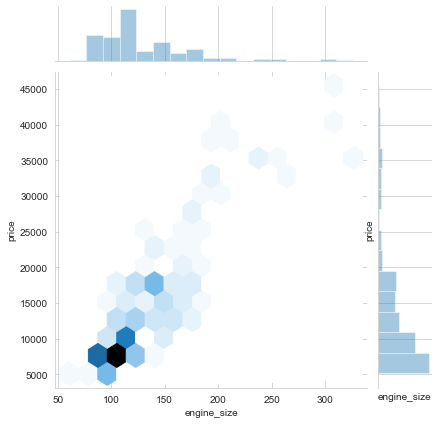

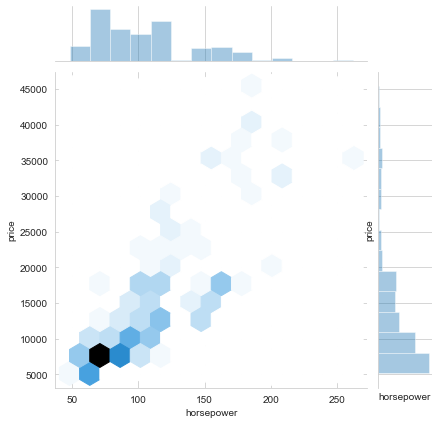

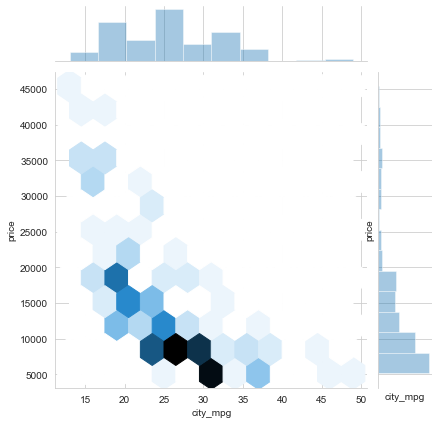

In [28]:
plot_desity_2d(auto_prices, num_cols, kind = 'hex')

The overall impression from the hexbin plot approximately the same as for the countour plots. A bit more detail is visible since cells with as few as 1 point are displayed. 

### Relation between categorical and numeric variables

You have created 2d plots of numeric variables But, what can you do if some of the features are categorical variables? There are two plot types specifically intended for this situation:
1. **Box plots** which highlight the quartiles of a distribution. Not surprisingly, the box plot contains a box. The range of the **inner two quartiles** are contained within the box. The lenght of the box shows the **interquartile range**. A line within the box shows the median. **Wiskers** extend for the maximum of 1.5 times the interquartile range or the extreme value of the data. Outliers beyond the wiskers are shown in a symbol. 
2. **Violine plots** which are a variation on the 1d KDE plot. Two back to back KDE curves are used to show the density estimate. 

Box plots of violin plots can be arranged side by side with data of the numerical variable grouped by the categories of the categorical variable. In this way each box or violin display represents the value of the numeric variable for cases of each category of the categorical variable.

Execute the code in the cell below to display box plots for the list of categorical variables, and examine the results. 

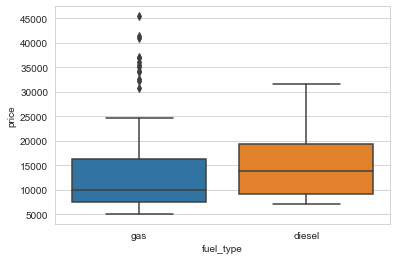

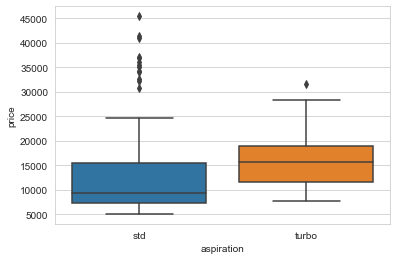

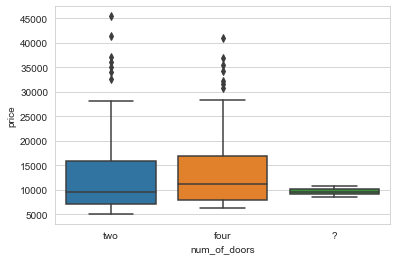

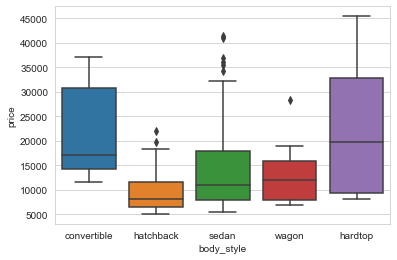

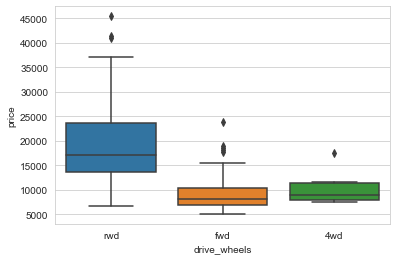

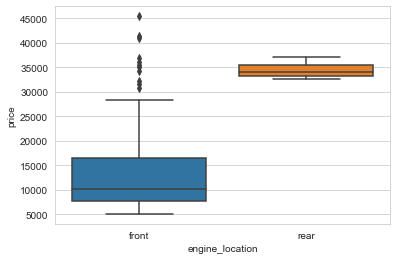

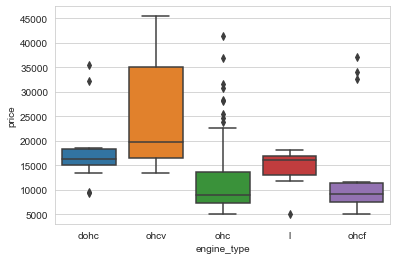

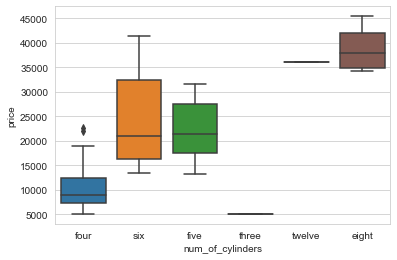

In [29]:
def plot_box(auto_prices, cols, col_y = 'price'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=auto_prices)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y) # Set text for y axis
        plt.show()
        
cat_cols = ['fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders']
plot_box(auto_prices, cat_cols)

For each categorical variable, you can see that a box plot is created for each unique category. Notice that for some of these cases, there are some noticeable differences between the price of autos by category. For example, for fuel_type or aspiration there are noticeable differences. In other cases, such as num_of_doors, the differences do not appear significant. For num_of_cylinders there are significant differences, but there are two categories with only one case, which is problematic. 

The code in the cell below creates a similar display as above using violin plots. Execute the code and examine the results. 

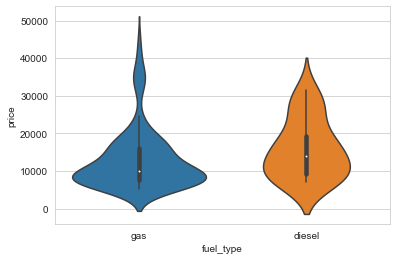

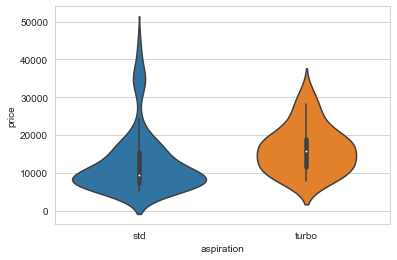

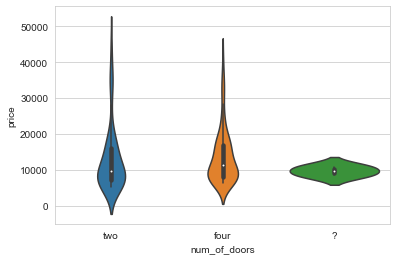

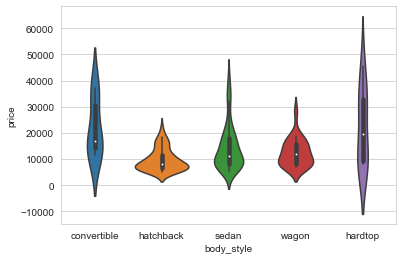

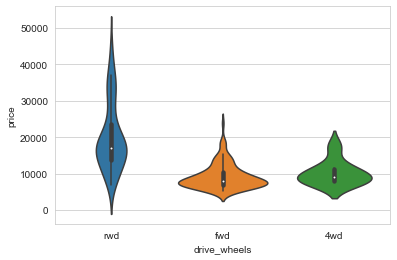

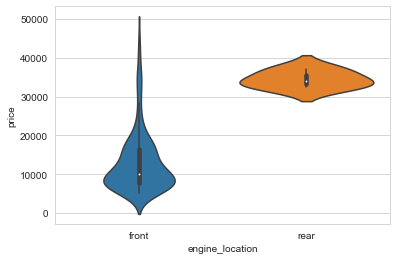

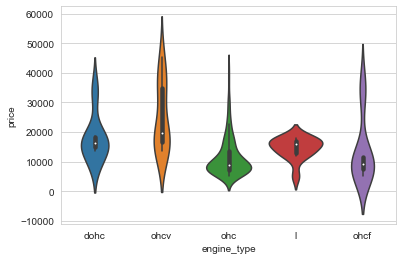

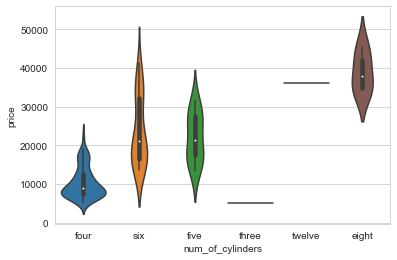

In [30]:
def plot_violin(auto_prices, cols, col_y = 'price'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=auto_prices)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y) # Set text for y axis
        plt.show()
        
plot_violin(auto_prices, cat_cols)

The interpretation of the violin plots is similar to the box plots. However, a bit more detail on distributions is visible. The area of each violin is the same on each plot display. Notice also that a type of box plot is visible inside each violin plot. 

As you examine the above plots notice that some relationships are more obvious. For example, it quite clear that the number of doors does not affect the price of the car and the body style has marginal influence at best. Whereas, engine_location and num_of_cylinders does affect price.  

## Use aesthetics to add project additional dimensions

Up until now, you have work with one or two variables on a single plot. But, with complex datasets it is useful to view multiple dimensions on each plot. The question is, how can this be done when graphics displays are limited to two dimensions? 

In this section, plot aesthetics are used to project additional dimensions. Some aesthetics are useful only for categorical variables, while others are useful for numeric variables. Keep in mind that not all plot aesthetics are equally effective. Tests of human perceptions have shown that people are very good as noticing small differences in position. This fact explains why scatter plots are so effective. In rough order of effectiveness these aesthetics are:
1. **Marker shape** is an effective indicator variable category. It is critical to select shapes which are easily distinguished by the viewer. 
2. **Marker size** shows values of a numeric variable. Be careful, as size is the span across the marker, not the area. 
3. **Marker color** is useful as an indicator of variable category. Color is the least effective of these three aesthetics in terms of human perception. Colors should be chosen to appear distinct. Additionally, keep in mind that many people, particularly men are red-green color blind. 

Categorical aesthetics, such as marker shape and color, are only effective if the differences in markers are perceptable. Using too many shapes or color creates a situation where the viewer cannot tell the differences between the categories. Typically a limit of about five to seven categories should be observed. 

### Marker shape

The code in the cell below uses marker shape to show the fuel type of the auto on a scatter plot. This is done by subsetting the data frame by each unique value of the categorical column. Shapes are defined in a list, which is referenced on each iteration of this inner loop. 

There is one tricky aspect to this code. The transparency parameter, alpha, must be passed to Matplotlib though a dictionary. The key is the argument, alpha, and the value is the argument value. 

Execute this code and examine the result. 

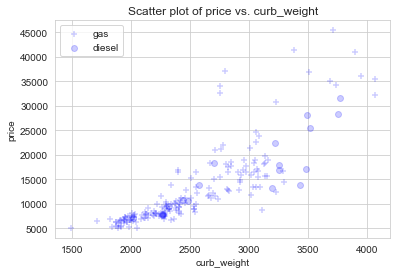

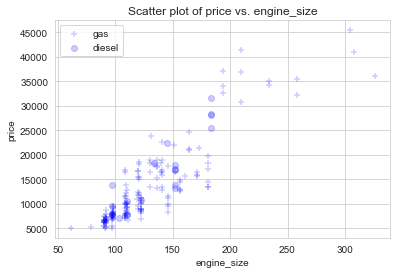

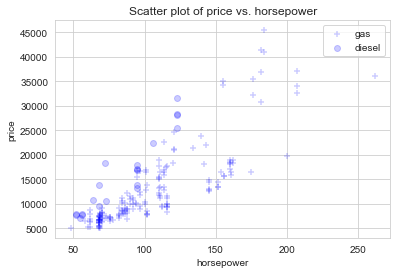

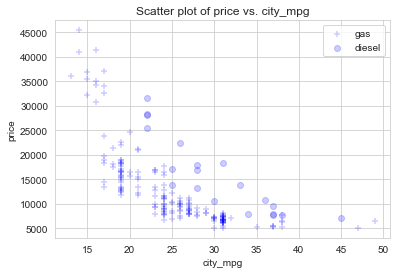

In [31]:
def plot_scatter_shape(auto_prices, cols, shape_col = 'fuel_type', col_y = 'price', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = auto_prices[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = auto_prices[auto_prices[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y) # Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter_shape(auto_prices, num_cols)                

While there is some overlap, the differences between gas and diesel autos are now apparent in these plots. This new view of the data helps to confirm and fuel type is a significant feature for determining auto price. 

Notice, that rather distinctive shapes have been chosen for this display. In summary, by adding shape by category a third dimension is projected onto these plots.

### Marker size

The code in the cell below uses marker size to display curb weight. Since Matplotlib uses area to compute  marker size, the values of curb weight are squared and then scaled by a convenient multiplier. Notice that since size, `s`, is a Matplotlib argument, it is passed in a dictionary along with alpha. Execute this code and examine the results. 

In [33]:
sns.regplot?

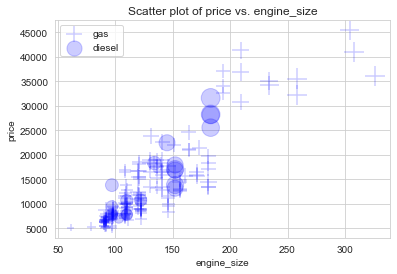

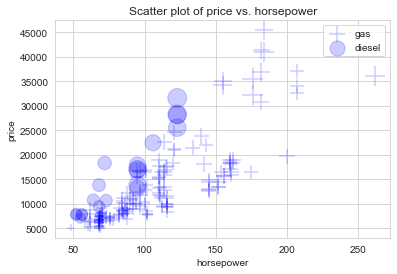

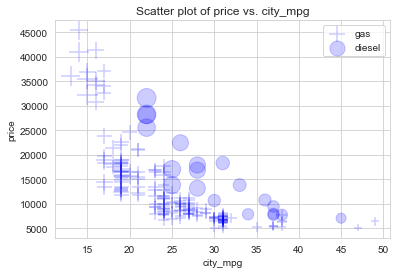

In [36]:
def plot_scatter_size(auto_prices, cols, shape_col = 'fuel_type', size_col = 'curb_weight',
                            size_mul = 0.000025, col_y = 'price', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = auto_prices[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = auto_prices[auto_prices[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
#                         scatter_kws={"alpha":alpha, "s":size_mul*auto_prices[size_col]**2},
#                         scatter_kws={"alpha":alpha, "s":50},
                        scatter_kws={"alpha":alpha, "s":size_mul*temp[size_col]**2},
                        fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y) # Set text for y axis
        plt.legend()
        plt.show()

num_cols = ['engine_size', 'horsepower', 'city_mpg']
plot_scatter_size(auto_prices, num_cols)  

There are several interesting aspects of these plots, each of which is useful in predicting the price of autos For diesel autos the relationship between curb_weight, price, engine_size, horsepower and city_mpg is complex with no clear trend. On the other hand, it appears that high price, large engine, high horsepower, and low city_mpg cars have large gas engines. 

The above plots are now projecting four dimensions on the 2d plot surface. 

### Color

As was already discussed, changes in color are  hard for many people to perceive. None the less, color is useful for projecting a limited number of categories of a variable. Choice of distinctive color helps this situation. 

The code in the cell below uses color to display the aspiration category of the auto. The two inner loops create subsets of the data which are plotted with a specific shape and color for the markers. Execute this code and examine the results. 

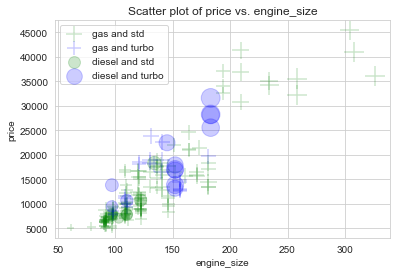

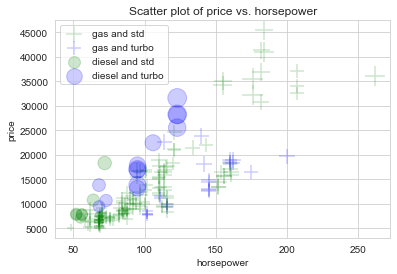

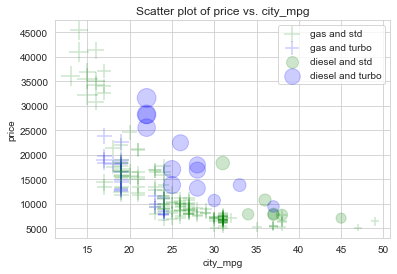

In [38]:
def plot_scatter_shape_size_col(auto_prices, cols, shape_col = 'fuel_type', size_col = 'curb_weight',
                                size_mul = 0.000025, color_col = 'aspiration', col_y = 'price', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    colors = ['green', 'blue', 'orange', 'magenta', 'gray'] # specify distinctive colors
    unique_cats = auto_prices[shape_col].unique()
    unique_colors = auto_prices[color_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            for j, color in enumerate(unique_colors):
                temp = auto_prices[(auto_prices[shape_col] == cat) & (auto_prices[color_col] == color)]
                sns.regplot(col, col_y, data=temp, marker = shapes[i],
                            scatter_kws={"alpha":alpha, "s":size_mul*temp[size_col]**2}, 
                            label = (cat + ' and ' + color), fit_reg = False, color = colors[j])
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y) # Set text for y axis
        plt.legend()
        plt.show()

num_cols = ['engine_size', 'horsepower', 'city_mpg']        
plot_scatter_shape_size_col(auto_prices, num_cols)

Each of these plots projects five dimensions of data onto the 2d display. Several relationship are now apparent in these data.

In summary, aspiration along with fuel_type should be useful predictors of price. 

Now, answer **Question 3** on the course page.

Color (or hue) can be used in other types of plots. For example, the code in the cell below displays split violin plots. The violins are split by type of aspiration and shown in different colors. Execute this code and examine the results.

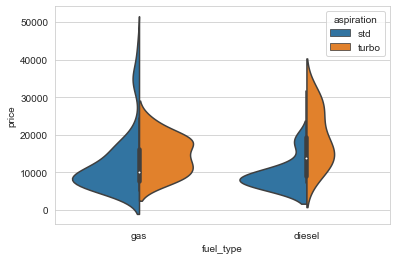

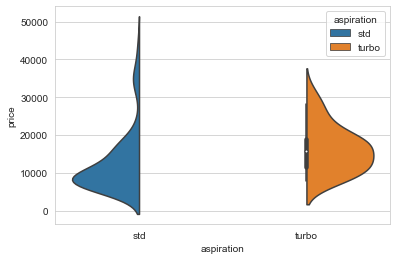

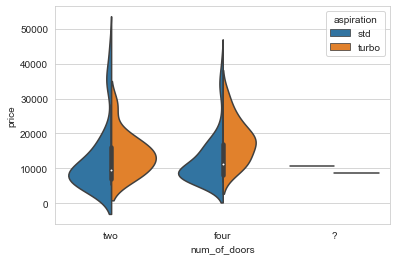

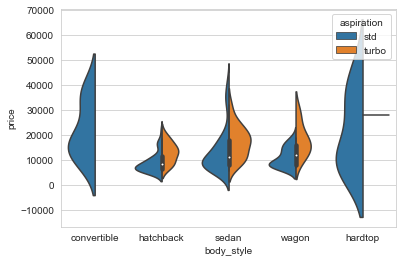

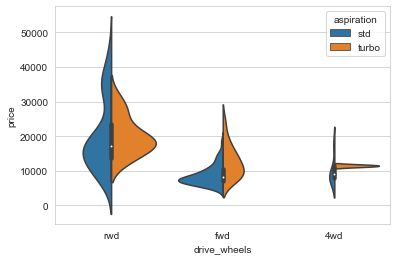

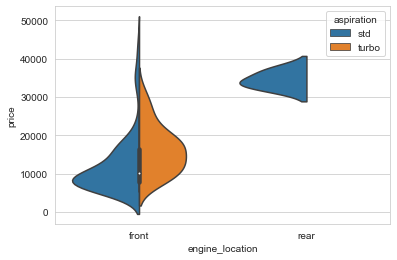

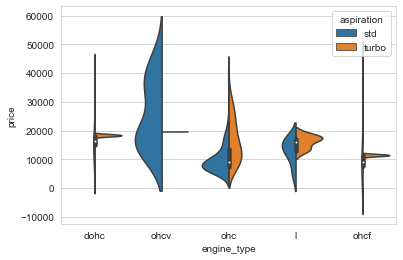

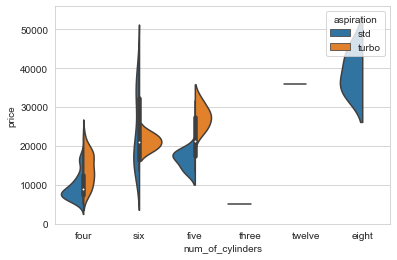

In [39]:
def plot_violin_hue(auto_prices, cols, col_y = 'price', hue_col = 'aspiration'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=auto_prices, hue = hue_col, split = True)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y) # Set text for y axis
        plt.show()
        
plot_violin_hue(auto_prices, cat_cols)    

These plots show that autos with turbo aspiration are generally more expensive than the comparable standard car. Thus, aspiration should be a useful predictor of price. 

## Multi-axis views of data

Up to now, you have been working with plots with a single pair of axes. However, it is quite possible to create powerful data visualizations with multiple axes. These methods allows you to examine the relationships between many variables in one view. These multiple views aid in understanding of the many relationships in complex datasets. There are a number of powerful multi-axes plot methods. In this lab you will work with two commonly applied methods:
1. **Pair-wise scatter plots** or **scatter plot matrices** are an array of scatter plots with common axes along the rows and columns of the array. The diagonal of the array can be used to display distribution plots. The cells above or below the diagonal can be used for other plot types like contour density plots.
2. **Conditioned plots**, **facetted plots** or **small multiple plots** use **group-by** operations to create and display subsets of the dataset. The display can be a one or two dimensional array organized by the groupings of the dataset. 

### Pair-wise scatter plot

You will now apply a scatter plot matrix to the auto.price dataset. The code in the cell below uses the `pairplot` function from the Seaborn package. This function creates a basic scatter plot matrix below the diagonal. Kernel density estimates of each variable are displayed on the diagonal. Using the `map_upper` method 2d density plots are displayed above the diagonal. Run the cell below to create a scatter plot matrix of the numeric features in the dataset.

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


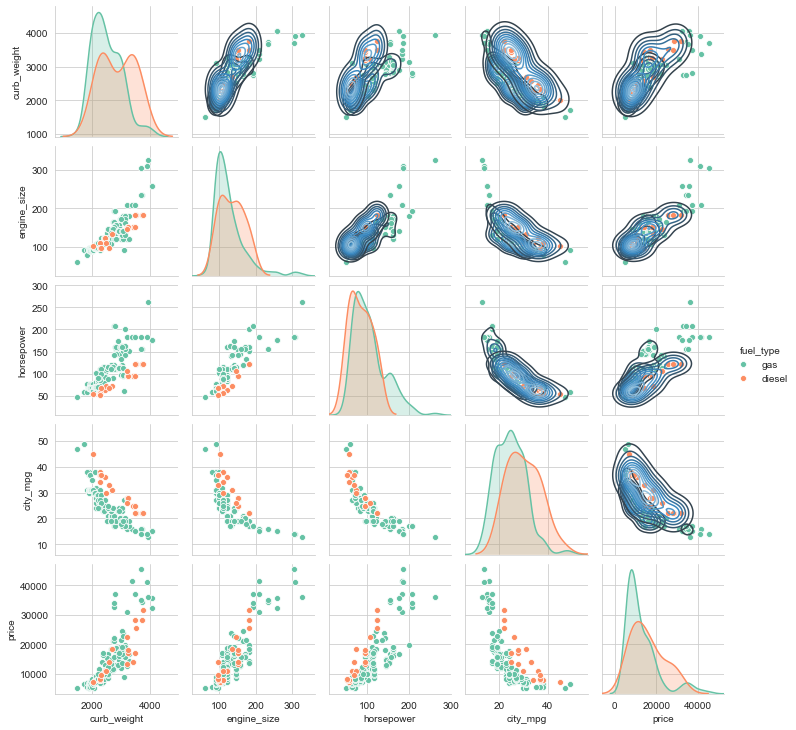

In [40]:
num_cols = ["curb_weight", "engine_size", "horsepower", "city_mpg", "price", "fuel_type"] 
sns.pairplot(auto_prices[num_cols], hue='fuel_type', palette="Set2", diag_kind="kde", size=2).map_upper(sns.kdeplot, cmap="Blues_d")

Review the scatter plot matrix (if the plot is too large for the cell, you can expand the cell by clicking its left margin).

Note that this plot is comprised of a number of scatter plots. For each variable there is both a row and a column. The variable is plotted on the vertical axis in the row, and on the horizontal axis in the column. In this way, every combination of cross plots for all variables is displayed in both possible orientations. KDE plots for each variable are on the diagonal. Above the diagonal you can see contour plots of 2d density estimates. There is a lot of detail here. 

Examine the above scatter plot matrix, which shows plots of each numeric column verses every other numeric column, and note the following: 
- Many features show significant collinearity, such as horsepower, engine_size and curb_weight. This suggests that all of these features should not be used when training a machine learning model.
- All of the features show a strong relationship with the label, price, such as city_mpg, engine_size, horsepower and curb_weight.
- Several of these relationships are nonlinear, particularly the relationships with the city_mpg feature.
- There is distinctively different behavior for the diesel vs. gas cars. 
- Most of the variables have asymmetric distributions.

Many of these relationships have been noted earlier. Having all this information on one plot can be useful. However, you may notice that some details are hard to see in such a display. 

**** 
Note: The number of scatter plots and the memory required to compute and display them can be a bit daunting. You may wish to make a scatter plot matrix with fewer columns. For example, you can eliminate columns which are collinear with other columns. 
****

### Conditioned plots

Now you will explore the use of conditioned plots. The code in the cell below does the following:
1. The Seaborn `FacetGrid` function defines the grid object over which the plots are displayed. The arguments of this function are the Pandas data frame and the grouping variables for the rows and the columns. 
2. The `map` method displays (maps) the plot function over the plot grid. In this case, the histogram function, `hist`, from Matplotlib is used. 

Execute the code and examine the results.

'drive_wheels'

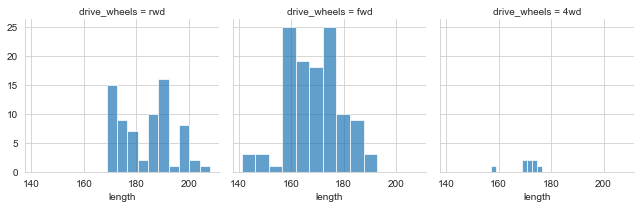

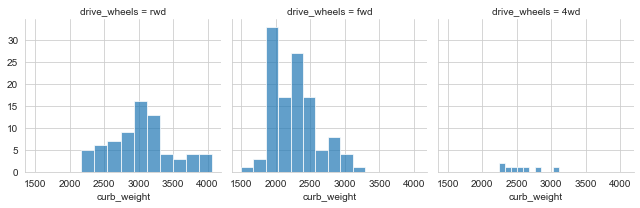

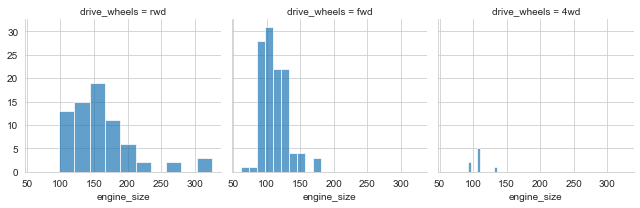

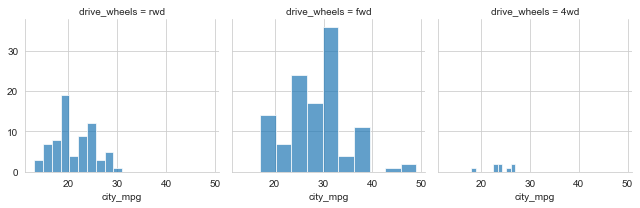

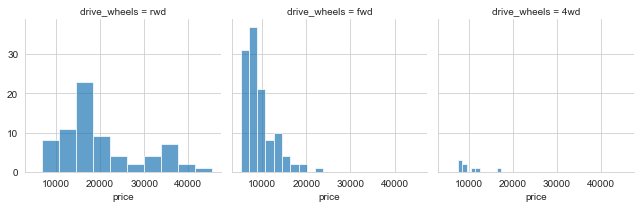

In [41]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ["length",
               "curb_weight",
               "engine_size",
               "city_mpg",
               "price"]

cond_hists(auto_prices, plot_cols2, 'drive_wheels')

Examine this series of conditioned plots. There is a consistent difference in the distributions of the numeric features conditioned on the categories of drive_wheels. 

Now, answer **Question 4** on the course page.

Next you will create and examine conditioned scatter plots. By conditioning multiple dimensions, you can project several additional dimensions onto the two-dimensional plot. The conditioning can be thought of as a group-by operation.

You will not use point shape as a differentiator in this exercise, but keep in mind that shape can be as useful as color. Additionally, shape may be easier for the significant fraction of the population who are color blind. 

Note: Be careful when combining methods for projecting multiple dimensions. You can easily end up with a plot that is not only hard to interpret, but even harder for you to communicate your observations to your colleagues. For example, if you use three conditioning variables, plus color and shape, you are projecting seven dimensions of your dataset. While this approach might reveal important relationships, it may just create a complex plot. 

The code in the cell below uses the Python seaborn package to create a two dimensional array of scatter plots in the following way:
1. As before, the grid object is defined. A color aesthetic is used with the palette specified.
2. The scatter plots are mapped to the grid. 

Execute this code and examine the results.

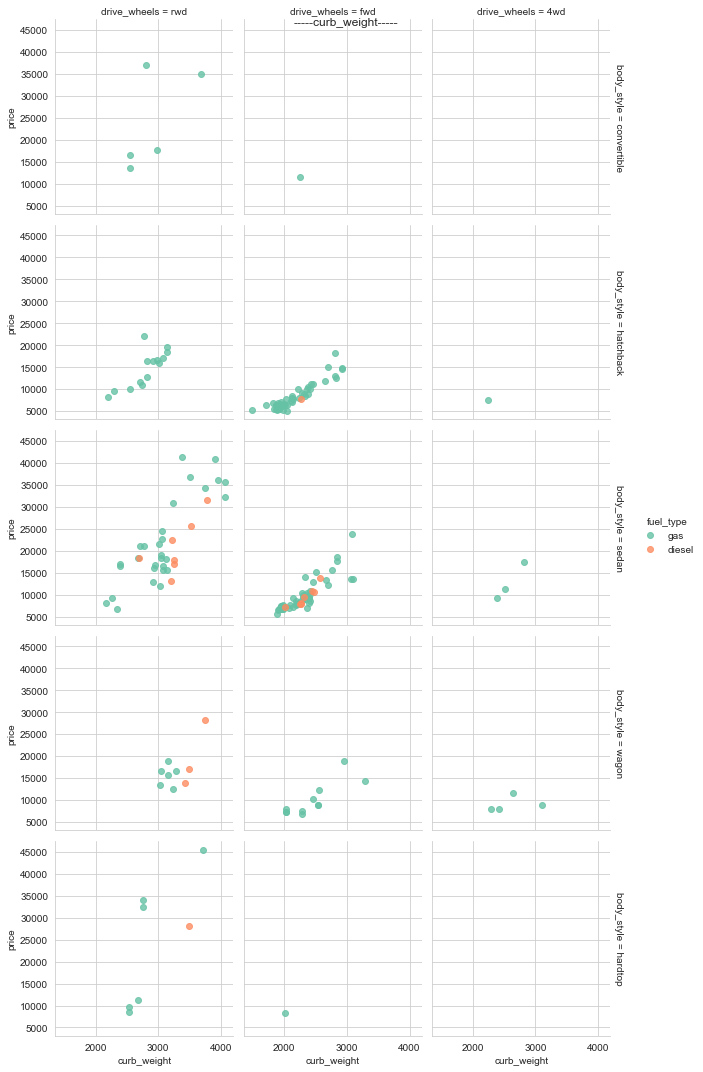

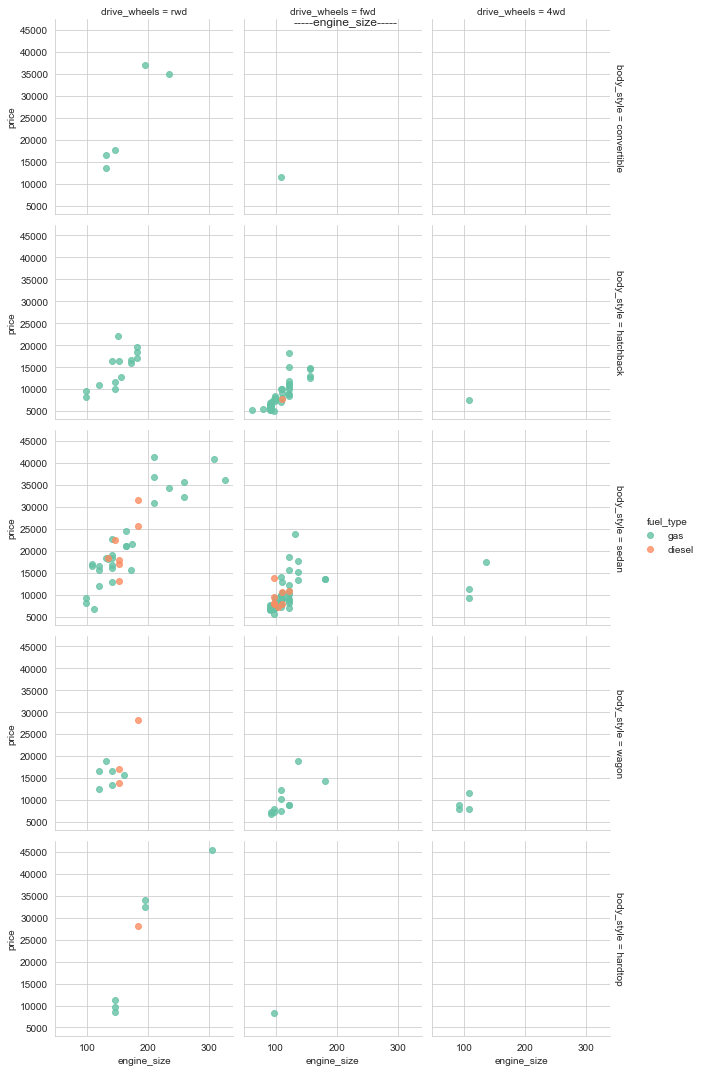

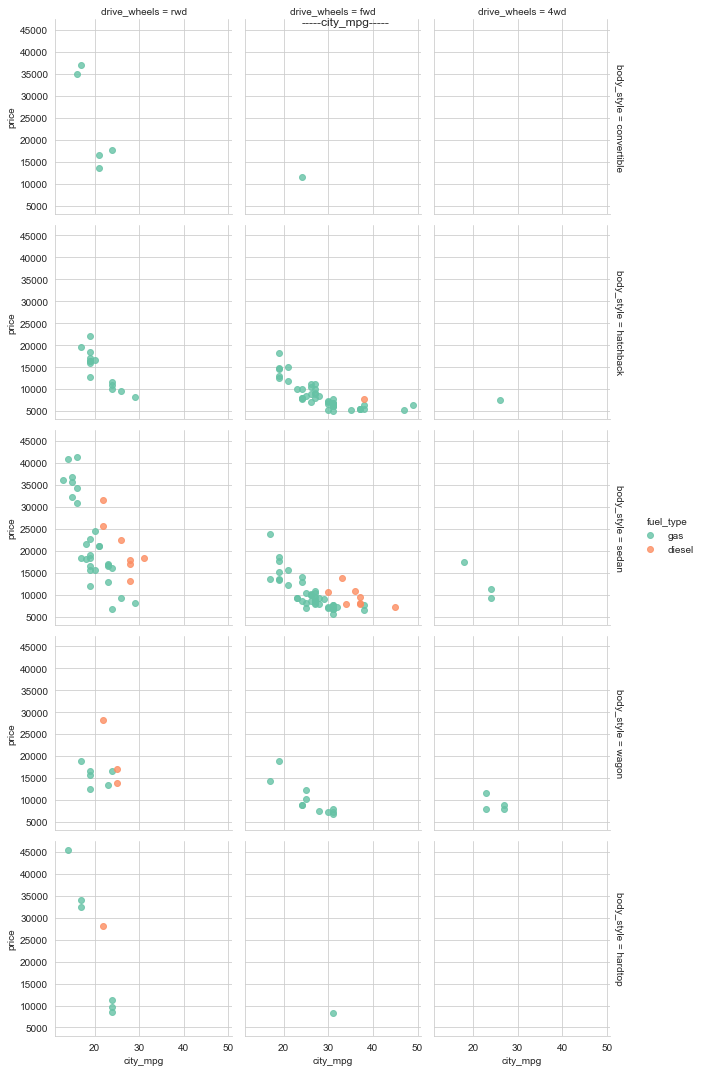

In [46]:
def cond_plot(cols):
    import IPython.html.widgets
    import seaborn as sns
    for col in cols:
        g = sns.FacetGrid(auto_prices, col="drive_wheels", row = 'body_style', 
                      hue="fuel_type", palette="Set2", margin_titles=True)
        g.map(sns.regplot, col, "price", fit_reg = False)
        g.fig.suptitle(f'-----{col}-----')
        g.add_legend()

num_cols = ["curb_weight", "engine_size", "city_mpg"]
cond_plot(num_cols)    

Carefully examine the plots you have created. These plots show a total of five dimensions of the data and there is a lot of detail to understand. Generally, you should be able to conclude the following:
- There are no cars at all for some combinations of conditioning variables. For example, there are no 4 wheel drive convertables or hardtops. As a result these plots are blank. 
- There are no diesel cars for some of the conditioning combinations, such as convertables and 4 wheel drive cars. 
- There are a number of distinct groupings. For example, front wheel drive and rear wheel drive sedans or wagons have distinctly different behaviors.   

Again, many of these observations can be made with other types of plots. However, there is an advantage of laying these plots out in sub-groups of the datasets. Different sub-groupings of the data highlight different relationships of the data. 

Finally, answer **Question 5** on the course page.

## Summary

By now, you should realize that exploring a dataset in detail is an open-ended and complex task. You may wish to try other combinations of conditioning variables, and color variable, to find some other interesting relationships in these data. Only by using multiple views with different plot types can you truely develop an understanding of relationships in complex data.

A constant challenge in visualizing complex datasets is the limitation of 2d projections. Aesthetics and multiple axis methods allow projection of higher dimensions onto the 2d plot surface. 

Specifically in this lab you:

1. Used summary statistics to understand the basics of a data set.
2. Used several types of plots to display distributions.
3. Created scatter plots with different transparency. 
4. Used density plots and hex bin plots to overcome overplotting. 
5. Applied aesthetics to project additional dimensions of categorical and numeric variables onto a 2d plot surface. 
6. Used pair-wise scatter plots and conditioned plots to create displays with multiple axes. 